In [1]:
# Import packages to use
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import glob
import re
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'errorbar.capsize': 2})

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
# Create data frame to store data from lf=0.5
data05=pd.DataFrame({'beta': [],'const_mean': [],'const_std': []})

# Check every .csv file in the folder
for filename in glob.glob('../BARRAS-ERROR-N100-LF0.5/*.csv'):
    # Import specific file
    df=pd.read_csv(filename, engine='python')
    
    # Get mean coefficient, deviation and beta from the file 
    mui=df['const'].mean()
    si=df['const'].std()
    bi=float(re.findall("[-+]?\d*\.\d+|\d+",filename)[3])
    
    # Create auxiliar data frame with extracted data
    aux=pd.DataFrame({'beta': [bi],'const_mean': [mui],'const_std': [si]})
    
    # Append auxiliar data frame to original data
    data05=data05.append(aux,ignore_index=True,sort=True)

In [8]:
# Create data frame to store data from lf=1.0
data1=pd.DataFrame({'beta': [],'const_mean': [],'const_std': []})

# Check every .csv file in the folder
for filename in glob.glob('../BARRAS-ERROR-N100-LF1.0/*.csv'):
    # Import specific file
    df=pd.read_csv(filename, engine='python')
    
    # Get mean constant, deviation and beta from the file 
    mui=df['const'].mean()
    si=df['const'].std()
    bi=float(re.findall("[-+]?\d*\.\d+|\d+",filename)[3])
    
    # Create auxiliar data frame with extracted data
    aux=pd.DataFrame({'beta': [bi],'const_mean': [mui],'const_std': [si]})
    
    # Append auxiliar data frame to original data
    data1=data1.append(aux,ignore_index=True,sort=True)

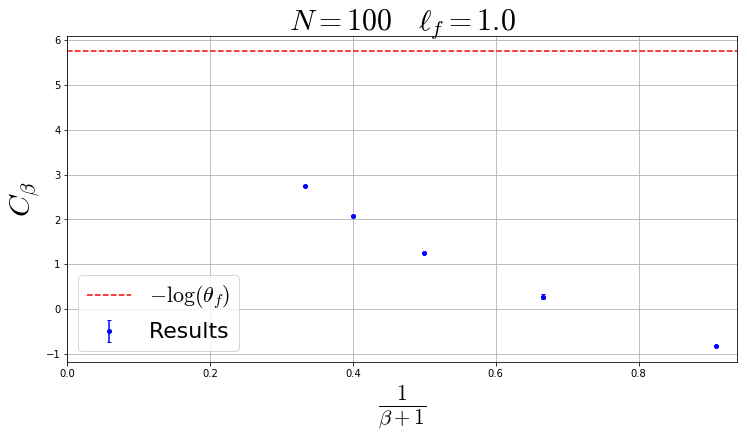

In [22]:
plt.figure(figsize=(12,6))

plt.errorbar(1/(data05['beta']+1),data05['const_mean'],data05.const_std,
             fmt='o',markersize=4,label='Results',c='blue')

plt.xlabel(r'$\frac{1}{\beta+1}$',fontsize=30)
plt.ylabel(r'$C_{\beta}$',fontsize=30)
plt.title(r'$N=100\quad\ell_f=1.0$',fontsize=30)

plt.axhline(-np.log(2*np.pi*0.5/(100*10)),label=r'$-\log(\theta_f)$',
            color='red',linestyle='--')

plt.xlim(0)
plt.grid(zorder=3)
plt.legend(fontsize=22)
plt.show()
plt.close()

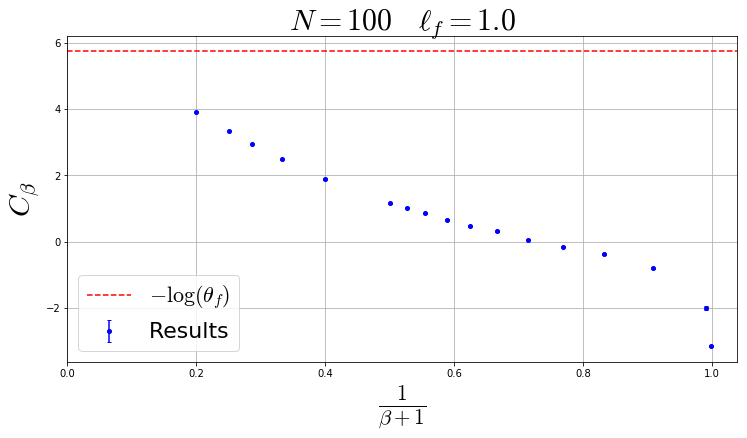

In [23]:
plt.figure(figsize=(12,6))

plt.errorbar(1/(data1['beta']+1),data1['const_mean'],data1.const_std,
             fmt='o',markersize=4,label='Results',c='blue')

plt.xlabel(r'$\frac{1}{\beta+1}$',fontsize=30)
plt.ylabel(r'$C_{\beta}$',fontsize=30)
plt.title(r'$N=100\quad\ell_f=1.0$',fontsize=30)

plt.axhline(-np.log(2*np.pi*0.5/(100*10)),label=r'$-\log(\theta_f)$',
            color='red',linestyle='--')

plt.xlim(0)
plt.grid(zorder=3)
plt.legend(fontsize=22)
plt.show()
plt.close()